<a href="https://colab.research.google.com/github/maryadriennerdrgz/CpE-AIML/blob/main/58033_Lab6_LakadMatatag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.2: Perceptrons, Gradient Descent, and Backpropagation
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$



### Part 1: Perceptron Algorithm
The Perceptron was first conceptualized by Frank Rosenblatt in his paper [The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf) in 1958. The perceptron is one of the earliest mathematical conceptualization of a brain neuron. In simplest terms, a perceptron does a weighted sum of all inputs and then performs an activation. In the early implementations of the perceptron the activation used was a step function described as:
$$step(z) = \left\{
  \begin{array}\\
    1 \text{ if } \ b+ \sum w_iX_n\geq 0 \\
    0 \text{ otherwise}
    \end{array}
\right.
$$
![image](https://jontysinai.github.io/assets/article_images/2017-11-11-the-perceptron/bio-vs-MCP.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

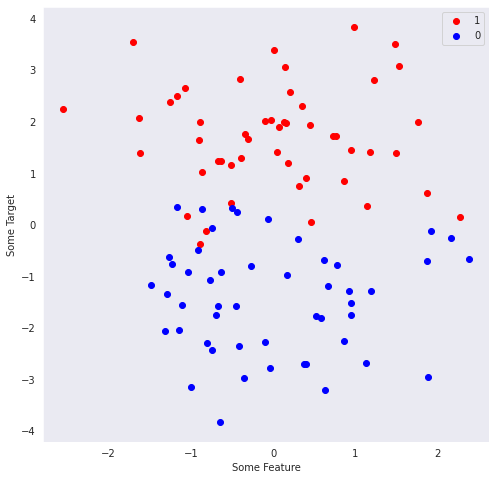

In [ ]:
## Creating a dataset
N = 100
cov = 0
center1 = np.array([0, 1.6]).T
cov_mat1 = np.array([
                    [1,cov],
                    [cov,1]
])

center2 = np.array([0, -1.6]).T
cov_mat2 = np.array([
                    [1,cov],
                    [cov,1]
])

np.random.seed(0)
X1 = np.array(np.random.multivariate_normal(center1,cov_mat1,int(N/2)))
X2 = np.array(np.random.multivariate_normal(center2,cov_mat2,int(N/2)))
## We'll declare another gaussian distribution with a different mean

X_train = np.concatenate((X1, X2), axis=0)
y_train = np.array([np.ones(int(N/2)), np.zeros(int(N-(N/2)))]).reshape((-1,1))

plt.figure(figsize=(8,8))
plt.scatter(X1[:,0],X1[:,1], c='r', label='1')
plt.scatter(X2[:,0],X2[:,1], c='b', label='0')
plt.ylabel("Some Target")
plt.xlabel("Some Feature")
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.random.seed(0)
M = N*0.4
X_1_test = np.array(np.random.multivariate_normal(center1,cov_mat1,int(M/2)))
X_2_test = np.array(np.random.multivariate_normal(center2,cov_mat2,int(M/2)))

X_test = np.concatenate((X_1_test, X_2_test), axis=0)
y_test = np.array([np.ones(int(M/2)), np.zeros(int(M-(M/2)))]).reshape((-1,1))

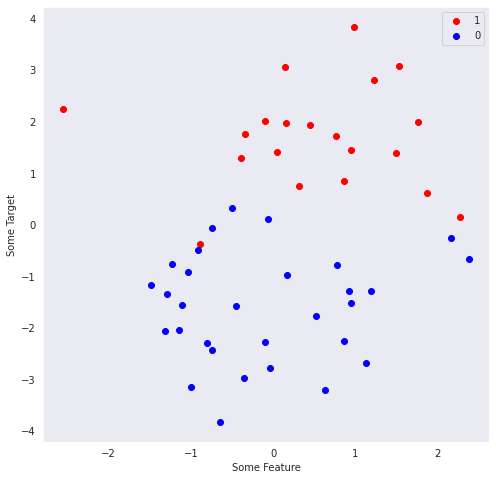

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X_test[:20,0],X_test[:20,1], c='r', label='1')
plt.scatter(X2[20:,0],X2[20:,1], c='b', label='0')
plt.ylabel("Some Target")
plt.xlabel("Some Feature")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def step_activation(z):
  """
  Compute the step activation of z

  Arguments:
  z -- A scalar or numpy array of any size.

  Return:
  filtered step activations step(z)
  """
  return np.where(z>=0, 1,0)

In [ ]:
def init_weights(dim):
  """
  Does a zero-initialization of the weights and bias

  Arguments:
  dim -- Desired dimension for the weights.

  Return:
  w -- initialized weights
  b -- initilaized bias
  """
  w = np.zeros(shape=(dim,1))
  b = 0
  return w, b

In [ ]:
def sum_err(preds,y):
  """
  Computes the Sum of Squared Errors for a set of predictions
  and truth values

  Arguments:
  preds -- Set of predictions.
  y -- Set of truth values

  Return:
  sse -- Sum of the squared errors
  """
  sse = np.sum(np.square(y-preds))
  return sse

In [ ]:
def accuracy(preds, Y):
  """
  Computes the accuracy for a set of predictions
  and truth values

  Arguments:
  preds -- Set of predictions.
  y -- Set of truth values

  Return:
  accuracy -- Computed accuracy
  """
  accuracy = 1-np.mean(np.abs(preds-Y))
  return accuracy

In [ ]:
def propagate(X,y,w,b):

  # Compute for the transformed vector of the 
  # dataset w.r.t the weights and biases
  z = (X@w) + b

  # Compute for the step activation
  A = step_activation(z) ## aka preds or hypothesis

  # Compute for the prediction error
  error = A-y
  acc = accuracy(y,A)

  # Update the weights and biases
  # Learning/Update routine
  w = np.dot(X.T,error)
  b = np.sum(error)

  # Compute the cost
  cost = sum_err(A,y)

  # Store the parameters in a dictionary for tracking
  grads = {"dw": w,
           "db": b}
  
  return grads, cost, acc

In [ ]:
w,b = init_weights(X_train.shape[1])
propagate(X_train,y_train,w,b)

({'db': 50.0, 'dw': array([[ -0.93607635],
         [-70.86262658]])}, 50.0, 0.5)

In [ ]:
def train(w, b, X, y, lr, epochs, early_stopping=True, stop_thresh=0.9):
  costs = []
  accuracies = []

  for i in range(epochs):
    # Do a forward propagation to obtain the gradients
    grads, cost, accuracy = propagate(X,y,w,b)

    # Locally store the gradients    
    dw=grads['dw']
    db=grads['db']

    # Update routine per epoch
    w = w - lr*dw
    b = b - lr*db

    # Store the costs per epoch for logs      
    
    if i % 1 == 0:
      print (f"Epoch {i}: Loss: {cost} Accuracy: {accuracy}")
      costs.append(cost)
      accuracies.append(accuracy)

    # Store the learned parameters for logs
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    if early_stopping and accuracy >= stop_thresh:
      print(f"Target metric met, stopping the training at {i} epoch(s).\n")
      break

  return params, grads, costs

In [ ]:
w,b = init_weights(X_train.shape[1])
learning_rate = 0.00001
epochs = 100

params, grads, costs = train(w, b, X_train, y_train, 
                             lr=learning_rate, epochs=epochs, 
                             early_stopping=True, stop_thresh=0.99)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Epoch 0: Loss: 50.0 Accuracy: 0.5
Epoch 1: Loss: 8.0 Accuracy: 0.92
Epoch 2: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 3: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 4: Loss: 5.0 Accuracy: 0.95
Epoch 5: Loss: 5.0 Accuracy: 0.95
Epoch 6: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 7: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 8: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 9: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 10: Loss: 8.0 Accuracy: 0.92
Epoch 11: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 12: Loss: 8.0 Accuracy: 0.92
Epoch 13: Loss: 7.0 Accuracy: 0.9299999999999999
Epoch 14: Loss: 8.0 Accuracy: 0.92
Epoch 15: Loss: 5.0 Accuracy: 0.95
Epoch 16: Loss: 8.0 Accuracy: 0.92
Epoch 17: Loss: 8.0 Accuracy: 0.92
Epoch 18: Loss: 8.0 Accuracy: 0.92
Epoch 19: Loss: 9.0 Accuracy: 0.91
Epoch 20: Loss: 8.0 Accuracy: 0.92
Epoch 21: Loss: 5.0 Accuracy: 0.95
Epoch 22: Loss: 8.0 Accuracy: 0.92
Epoch 23: Loss: 8.0 Accuracy: 0.92
Epoch 24: Loss: 9.0 Accuracy: 0.91
Epoch 25: Loss: 8.0 Acc

In [ ]:
def predict(X, weights, bias):
  z = (X@weights)+bias
  return np.where(z>=0, 1,0)


In [ ]:
weights = params["w"]
bias = params["b"]
preds = predict(X_test,weights,bias)
accuracy(y_test, preds)

0.9

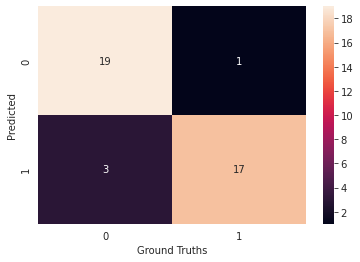

In [ ]:
c_matrix = confusion_matrix(y_test, preds)
sns.heatmap(c_matrix, annot=True)
plt.xlabel("Ground Truths")
plt.ylabel("Predicted")
plt.show()

## Part 2: Back-propagation
Although the Perceptron with the step activation produces good results producing a linear classifier, it lacks another fundamental technique for being a robust neural network model—Backpropagation. Backpropagation is a short form for "backward propagation of errors." It is a method of training artificial neural networks. This method helps to calculate the gradient of a loss function for all the weights in the network. <br>
In this section, we will use a sigmoid function as an activation function instead of a step activation. Since backpropagation will not be effective with the step function its gradient (derivative) is zero, and that will not be useful for computing the loss function.<br>
<b>Loss Function</b><br>
A loss function is the function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function [[1]](https://www.deeplearningbook.org/contents/numerical.html). <br>
To save you the time and brainpower, for our example our loss function is:
$$J(\theta)=\frac{1}{m} \sum^m_{i}cost(h_{\theta}(x^{(i)}, y^{(i)}) \\
\text{if y = 1} : -\log{(h_\theta(x))}\\
\text{if y = 0} : -\log{(1-h_\theta(x))}\\
J(\theta)=-\frac{1}{m} \sum^m_{i}{y^{(i)}\log{(h_\theta(x))}+(1-y^{(i)})(\log{(1-h_\theta(x))}} \\
J(\theta)=-\frac{1}{m} \sum^m_{i}{Y^T\log(h)+(1-Y)^T\log(1-h)}
$$

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))    
    return s

In [ ]:
def transfer_derivative(d):
  return d*(1.0-d)

In [ ]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data of size
    Y -- true "label" vector 

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    alpha = 10e-8
    
    # FORWARD PROPAGATION (FROM X TO COST)
    z = (X@w)+b
    h = sigmoid(z)    # compute activation
    J = -1 / m * np.sum(Y * np.log(h+alpha) + (1-Y) * np.log((1-h)+alpha))  # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    error = (h-Y)*transfer_derivative(h) ## dJ/dA * dA/dz = dJ/dz
    dw = 1/m * X.T @ error # dJ/dz * dz/dw = dJ/dw
    db = 1/m * np.sum(error) # dJ/dz * dz/db = dJ/db

    cost = np.squeeze(J)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
def optimize(w, b, X, Y, epochs, lr, print_cost = True):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size
    b -- bias, a scalar
    X -- data of shape 
    Y -- true "label" vector
    epochs -- number of iterations of the optimization loop
    lr -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(epochs):
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Update the weights
        w = w - lr * dw
        b = b - lr * db
        
        # Record the costs
        if i % 10 == 0:
            costs.append(cost)
        
        # Print the cost every 10 training iterations
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
w,b = init_weights(X_train.shape[1])
learning_rate = 0.6
epochs = 100
params, grads, costs = optimize(w, b, X_train, y_train, 
                             lr=learning_rate, epochs=epochs)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.350665
Cost after iteration 20: 0.284379
Cost after iteration 30: 0.253283
Cost after iteration 40: 0.234337
Cost after iteration 50: 0.221268
Cost after iteration 60: 0.211570
Cost after iteration 70: 0.204015
Cost after iteration 80: 0.197924
Cost after iteration 90: 0.192885
w = [[0.07313867]
 [1.59136568]]
b = -0.20322841769834069
dw = [[-0.00085037]
 [-0.00786011]]
db = 0.0023286276028710523


In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size
    b -- bias, a scalar
    X -- data of size 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    A = sigmoid((X@w)+b) 
    Y_prediction = np.where(A>=0.5,1,0)
    
    return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 10, learning_rate = 0.5, print_cost = True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = init_weights(X_train.shape[1])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
neuron_model = model(X_train, y_train, X_test, y_test, num_iterations=300, learning_rate=1)

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.296963
Cost after iteration 20: 0.244484
Cost after iteration 30: 0.220274
Cost after iteration 40: 0.205638
Cost after iteration 50: 0.195606
Cost after iteration 60: 0.188204
Cost after iteration 70: 0.182471
Cost after iteration 80: 0.177872
Cost after iteration 90: 0.174085
Cost after iteration 100: 0.170904
Cost after iteration 110: 0.168187
Cost after iteration 120: 0.165835
Cost after iteration 130: 0.163777
Cost after iteration 140: 0.161958
Cost after iteration 150: 0.160337
Cost after iteration 160: 0.158883
Cost after iteration 170: 0.157571
Cost after iteration 180: 0.156379
Cost after iteration 190: 0.155292
Cost after iteration 200: 0.154296
Cost after iteration 210: 0.153379
Cost after iteration 220: 0.152533
Cost after iteration 230: 0.151750
Cost after iteration 240: 0.151022
Cost after iteration 250: 0.150343
Cost after iteration 260: 0.149710
Cost after iteration 270: 0.149117
Cost after iteration 280: 0.148

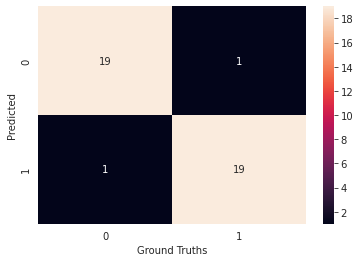

In [ ]:
c_matrix = confusion_matrix(y_test, neuron_model['Y_prediction_test'])
sns.heatmap(c_matrix, annot=True)
plt.xlabel("Ground Truths")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score 

print(f"F1 Score: \t{f1_score(y_test, neuron_model['Y_prediction_test'])}")
print(f"Recall: \t{recall_score(y_test, neuron_model['Y_prediction_test'])}")
print(f"Precision: \t{precision_score(y_test, neuron_model['Y_prediction_test'])}")

F1 Score: 	0.9500000000000001
Recall: 	0.95
Precision: 	0.95


In [ ]:
def plot_weights(X,w,b):
  plt.figure(figsize=(10,10))
  plt.scatter(X[:int(X.shape[0]/2),0], X[:int(X.shape[0]/2),1], 
              s = 50, color='blue', alpha=0.5, label=1)
  plt.scatter(X[int(X.shape[0]/2):,0], X[int(X.shape[0]/2):,1],  
              s = 50, color='red', alpha=0.5, label=0)
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  linex = np.linspace(x_min, x_max)
  liney = -w[0]/w[1] * linex - b/w[1]
  plt.plot(linex, liney, label='decision bounday')
  plt.legend()
  plt.axhline(color='black')
  plt.axvline(color='black')
  plt.grid()
  plt.show()

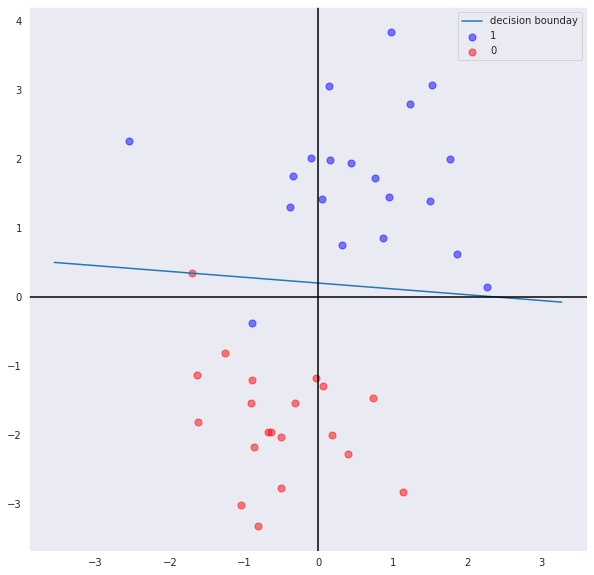

In [ ]:
plot_weights(X_test,neuron_model['w'],neuron_model['b'])

## Laboratory Activity
1. For the laboratory activity, obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.

2. Identify an algorithm or method in performing a single or multiple variable classification using the Perceptron alogrithm. 

3. You must re-create your Perceptron algorithm with Gradient Descent and Backpropagation using your own code in a separate Google Colab. However, you are required to observe the following:

>* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.


1. Our dataset for this laboratory is the Iris Flower dataset. As an example of linear discriminant analysis, this dataset uses multiple measurements in taxonomic problems. It describes also the specific biological characteristics of different types of Iris flowers, specifically the length and width of both pedals and sepals, both of which are part of the flower's reproductive system. The data set includes 50 samples from each of three Iris species (Iris Setosa, Iris virginica, and Iris versicolor). Each sample had four characteristics measured: the length and width of the sepals and petals in centimeters. [1]

2. One algorithm or method in performing a single or multiple variable classification is the perceptron algorithm. Perceptron algorithm can be used for classification. Perceptron algorithm is divided into two parts, single and multiple layer perceptrons. Single layer perceptron is performed by calculating the sum of the input vector and each of them is multiplied to their corresponding weights, the output then is the input of the activation function. Multi layer perceptron on the other hand consists of an inner and outer layer that are both connected. The two classified layers maybe alike, but there existing are the multiple hidden layers that are private to the neural networks. 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Dataset Overview

In [ ]:
df_flower = pd.read_csv('https://raw.githubusercontent.com/maryadriennerdrgz/CpE-AIML/main/Data/IRIS.csv')
df_flower

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df_flower['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

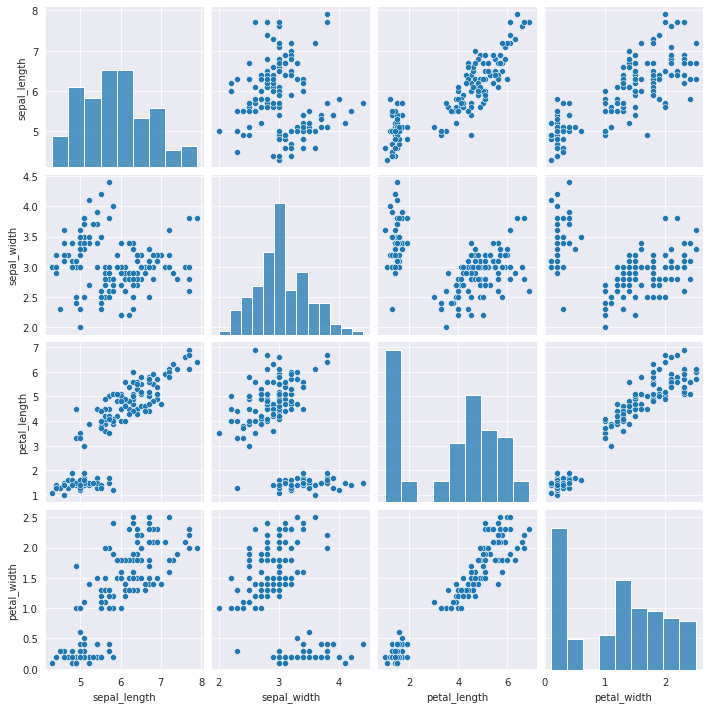

In [ ]:
sns_plot = sns.pairplot(df_flower)
sns_plot

In [ ]:
correlation = df_flower.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


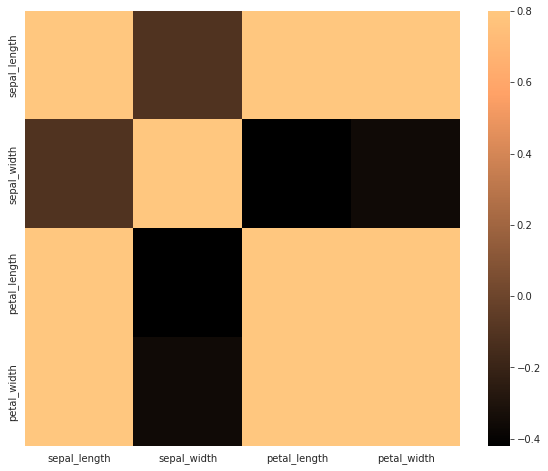

In [ ]:
dfheatmap = df_flower.corr()
ax = plt.subplots(figsize=(10,8)), sns.heatmap(dfheatmap, vmax=.8, square=True, cmap="copper")

Completion


In [ ]:
X = df_flower.drop('species', axis=1)
y = df_flower['species']

In [ ]:
class Perceptron(object):

  def __init__(self, input_dim):
    self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
    self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)

  def activation(self, pred):
    return np.where(pred >= 0, 1, 0)

  def predict(self, data):
    return self.activation(np.dot(data,self.weights.T))

  def accuracy(self, features, targets):
    predictions = self.predict(features)
    return (predictions == targets).mean()

  def train(self, xtrain, ytrain, xtest, ytest, epochs, lr=0.01):
    losses = []
    train_accuracies = []
    test_accuracies = []
    for e in range(1, epochs + 1):
      epoch_loss = 0
      predictions = []
      for data, target in zip(xtrain, ytrain):
        pred = self.predict(data)
        error = target - pred
        update = lr * error
        epoch_loss += error ** 2
        self.weights += update * data
        self.bias += update
        
      train_acc = self.accuracy(xtrain, ytrain)
      test_acc = self.accuracy(xtest, ytest)
      train_accuracies.append(train_acc)
      test_accuracies.append(test_acc)
      losses.append(epoch_loss)

      print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}, Train Acc : {train_acc}, Test Acc : {test_acc}", end="")
      sys.stdout.flush()

    return {'losses': losses, 'train_acc': train_accuracies, 'test_acc': test_accuracies}

In [ ]:
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.25, shuffle=True)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)


(112, 4) (112,)
(38, 4) (38,)


In [ ]:
p = Perceptron(input_dim=2)
history = p.train(Xtrain,ytrain, Xtest, ytest, epochs=350, lr=0.001)

TypeError: ignored

In [ ]:
print(p.weights, p.bias)

[-1.69480065 -1.52406648] [0.52947896]


In [ ]:
fig = plt.figure(figsize=[15,5])

ax1 = fig.add_subplot(121)
ax1.plot(history['losses'], c='r')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2 = fig.add_subplot(122)
ax2.plot(history['train_acc'], c='b', label='train_acc')
ax2.plot(history['test_acc'], c='g', label='test_acc')
ax2.legend()
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')

Reference

[1]  MathNerd “Iris Flower Dataset,” Kaggle, 22-March-2018. [Online]. Available: https://www.kaggle.com/arshid/iris-flower-dataset. [Accessed: 10-Dec-2021].